# Laboratorio: Aplicación de operaciones elementales
# Mejora de contraste mediante ecualización de histograma

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Leer imagen y obtener histograma original:

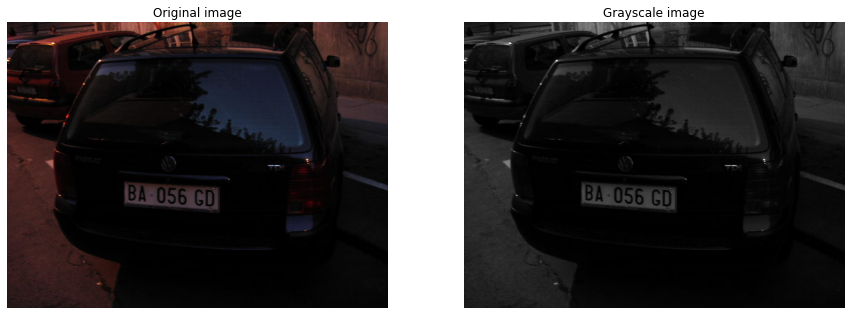

In [38]:
# Leer imagen
img_route = 'imagenes/'
img_file = 'P9180049.jpg'
#img_file = 'P9190064.jpg'
image = cv2.imread(img_route + img_file)

# Escala de grises
img_gray = np.floor(0.11*image[:,:,0] + 0.59*image[:,:,1] + 0.3*image[:,:,2]).astype(np.uint8)

# Mostrar la imagen original y la de escala de grises
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.title.set_text('Original image')
#BGR a RGB para mostrar la imagen
ax1.imshow(image[:,:,::-1])
ax1.axis('off')
ax2.title.set_text('Grayscale image')
ax2.imshow(img_gray, cmap='gray')
ax2.axis('off')
plt.show() 


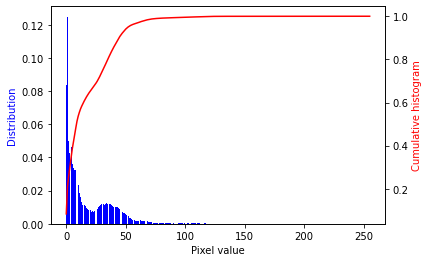

In [39]:
# Convertir imagen a array unidimensional y obtener numero de veces que aparece cada valor
histogram_array = np.bincount(img_gray.flatten(), minlength=256)

# Normalizar histograma
total_pixels = np.sum(histogram_array)
histogram_array = histogram_array/total_pixels

# Histograma acumulado
cumulative_histogram_array = np.cumsum(histogram_array)

# Plotear el histograma original y el acumulado
fig, ax1 = plt.subplots()
ax1.bar(np.arange(256), histogram_array, color = 'blue')
ax1.set_xlabel('Pixel value')
ax1.set_ylabel('Distribution', color = 'blue')
ax2 = ax1.twinx()
ax2.plot(np.arange(256), cumulative_histogram_array, color = 'red')
ax2.set_ylabel('Cumulative histogram', color = 'red')
plt.show()


Vemos que los valores de intensidad están acumulados en las zonas bajas, es decir, la imagen está subexpuesta. Aplicamos la ecualización.

## Ecualización del histograma

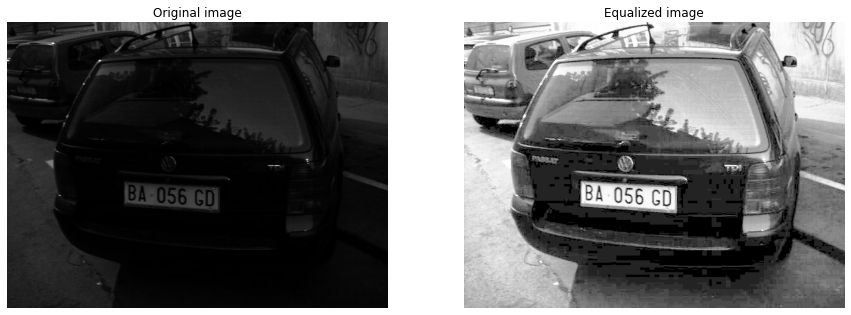

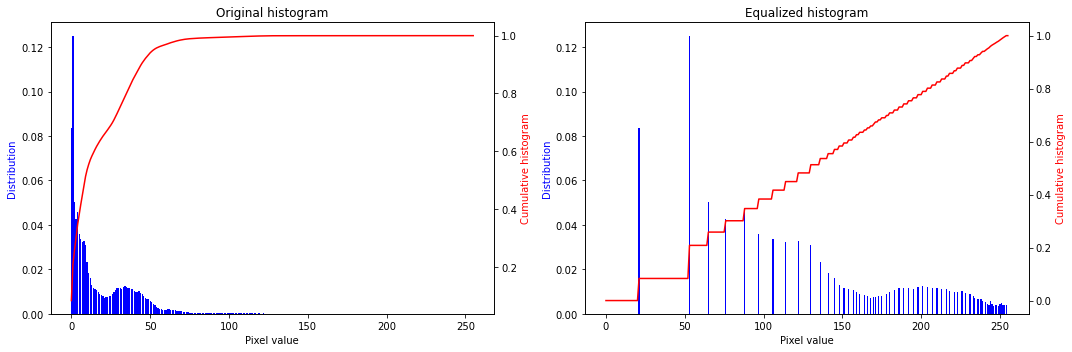

In [40]:
# Crear el transform map
transform_map = np.floor(255 * cumulative_histogram_array).astype(np.uint8)

# Convertir imagen original en array unidimensional
img_list = img_gray.flatten().tolist()

# Aplicar transform map
eq_img_list = [transform_map[i] for i in img_list]

# Volver a convertir la imagen en array bidimensional
eq_img = np.reshape(eq_img_list, img_gray.shape)

# Mostar la imagen original y la ecualizada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.title.set_text('Original image')
ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')
ax2.title.set_text('Equalized image')
ax2.imshow(eq_img, cmap='gray')
ax2.axis('off')
plt.show()

# Plotear el histograma original y el ecualizado
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 5))

ax1.title.set_text('Original histogram')
ax1.bar(np.arange(256), histogram_array, color = 'blue')
ax1.set_xlabel('Pixel value')
ax1.set_ylabel('Distribution', color = 'blue')
ax2 = ax1.twinx()
ax2.plot(np.arange(256), cumulative_histogram_array, color = 'red')
ax2.set_ylabel('Cumulative histogram', color = 'red')

# Calcular histograma y histograma acumulado de la imagen ecualizada
eq_histogram_array = np.bincount(eq_img.flatten(), minlength=256)/total_pixels
eq_cumulative_histogram_array = np.cumsum(eq_histogram_array)

ax3.title.set_text('Equalized histogram')
ax3.bar(np.arange(256), eq_histogram_array, color = 'blue')
ax3.set_xlabel('Pixel value')
ax3.set_ylabel('Distribution', color = 'blue')
ax4 = ax3.twinx()
ax4.plot(np.arange(256), eq_cumulative_histogram_array , color = 'red')
ax4.set_ylabel('Cumulative histogram', color = 'red')

plt.tight_layout()
plt.show()

Vemos que ahora el histograma acumulado es una linea recta, lo que significa que la imagen está ecualizada, y que la distribución de los valores de los pixeles es uniforme.

## Binarización de la imagen

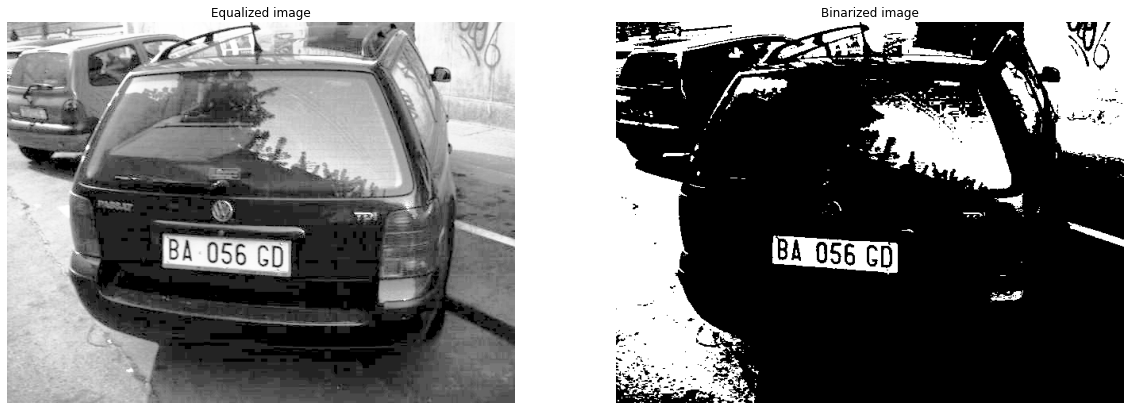

In [41]:
# Establecemos los límites para la binarización
umbral_limit_sup = 0.75*255
umbral_limit_inf = 0*255
binarized_img = np.where((eq_img < umbral_limit_sup) &  (eq_img > umbral_limit_inf), 0, 255).astype(np.uint8)

# Mostar la imagen ecualizada y la binarizada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.title.set_text('Equalized image')
ax1.imshow(eq_img, cmap='gray')
ax1.axis('off')
ax2.title.set_text('Binarized image')
ax2.imshow(binarized_img, cmap='gray')
ax2.axis('off')
plt.show()

## Guardar la imagen resultante

In [43]:
# Guardar imagen binarizada

cv2.imwrite('imagenes/procesadas/' + img_file, binarized_img)

True